In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


# 🚗 Kullanılmış Araba Fiyat Tahmini Projesi
**🎯 Proje Amacı**

Bu projenin amacı, ikinci el (kullanılmış) araçların özelliklerine bakarak satış fiyatlarını tahmin etmektir. Bu sayede, hem alıcıların hem de satıcıların piyasa fiyatları hakkında daha doğru öngörülerde bulunabilmesi hedeflenmektedir.

**📌 Problem Tanımı**

Kullanılmış araç piyasasında fiyatlar birçok etkene bağlı olarak değişiklik göstermektedir. Araç markası, modeli, üretim yılı, kilometresi, yakıt türü ve vites tipi gibi özellikler fiyat üzerinde önemli rol oynamaktadır. Bu proje ile, makine öğrenmesi modelleri kullanarak bu özelliklerden faydalanarak fiyat tahmini yapılacaktır.

**🧠 Hedef**

Veriyi analiz ederek anlamlı çıkarımlar yapmak

Eksik değer, aykırı değer ve kategorik verilerle uygun şekilde ilgilenmek

Farklı regresyon modelleri (Linear Regression, Random Forest, Gradient Boosting) deneyerek performanslarını karşılaştırmak

En düşük RMSE (Root Mean Squared Error) değerine ulaşan modeli belirlemek

Elde edilen sonuçları grafiklerle destekleyip yorumlamak

## 📚 1. Gerekli Kütüphanelerin Yüklenmesi

Bu bölümde proje boyunca kullanacağımız temel Python kütüphanelerini yüklüyoruz:
## ⚠️ Uyarı Mesajlarını Bastırma

Notebook çıktılarında görünmesini istemediğimiz `RuntimeWarning`, `FutureWarning` gibi uyarıları bastırmak için `warnings` modülünü kullanıyoruz. Bu işlem analiz sürecini etkilemez, sadece ekranın daha temiz görünmesini sağlar.


**- `pandas`:** Veri analizi için  
**- `numpy`:** Sayısal işlemler için  
**- `matplotlib` - `seaborn`:** Görselleştirme için  
**- `scikit-learn`:** Makine öğrenmesi modelleri ve metrikler için

In [41]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Modelleme ve değerlendirme için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


## 📥 2. Veri Setinin Yüklenmesi

Craigslist sitesinden alınan ikinci el araç verilerini içeren veri setimizi Kaggle ortamına yüklüyoruz ve ilk 5 satırına göz atıyoruz.


In [42]:
# Kaggle notebook ortamındaki path ile veri okunur
df = pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')

# İlk 5 satırın görüntülenmesi
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


## 🔍 3. Veri Setinin Genel İncelemesi (EDA)

Bu aşamada veri setimizin:

- Satır ve sütun sayısını **(`shape`)**
- Değişkenlerin tiplerini ve eksik değer durumunu **(`info()`)**
- Sayısal değişkenlerin temel istatistiklerini **(`describe()`)**
- Eksik veri miktarını daha detaylı inceleyeceğiz

Böylece verimizin genel yapısını anlayacak ve sonraki adımlarda nasıl temizleyeceğimize karar vereceğiz.


In [43]:
# Veri setinin boyutu
print("Veri seti satır ve sütun sayısı:", df.shape)

# Veri tipi ve eksik değerler
df.info()

# Sayısal değişkenlerin istatistikleri
df.describe()

# Her sütundaki eksik değer sayısı
missing_values = df.isnull().sum()
print("\nEksik değer sayısı sütun bazında:")
print(missing_values[missing_values > 0])


Veri seti satır ve sütun sayısı: (426880, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  ty

## 🧹 Eksik Veri ve Temizleme Stratejisi

Bu projede kullandığımız veri setinde birçok sütunda eksik değerler bulunmakta. Eksik değerlerin işlenmesi modelin doğruluğu için çok önemli. Bu nedenle aşağıdaki stratejiyi uygulayacağız:

### 1. Tamamen Boş Olan Sütunlar
- **`county`** sütunu tamamen boş olduğu için bu sütunu veri setinden çıkaracağız.

### 2. Çok Eksik Olan Sütunlar
- **`size`**, **`VIN`** gibi sütunlarda eksik değer oranı çok yüksek (%30 ve üzeri).
- Bu sütunları analiz ve modelleme için çıkaracağız.

### 3. Az Eksik Olan Sayısal Sütunlar
- `year`, `odometer`, `lat`, `long` gibi sayısal sütunlarda eksik değer oranı oldukça düşük.
- Bu sütunlardaki eksik değerleri **medyan** ile dolduracağız. Medyan, aykırı değerlerden etkilenmediği için tercih edilir.

### 4. Kategorik Sütunlar
- `manufacturer`, `model`, `condition`, `cylinders`, `fuel`, `title_status`, `transmission`, `drive`, `type`, `paint_color` gibi sütunlardaki eksik değerleri,
- Bu sütunların en sık görülen (mod) kategorisi ile dolduracağız.

### 5. Çok Az Eksik Olan Diğer Sütunlar
- `image_url`, `description`, `posting_date` gibi sütunlarda az sayıda eksik var.
- Bu sütunları anlamlı şekilde dolduracağız (örneğin, 'No Image', 'No Description', 'Unknown').

---

### Temizleme işlemini gerçekleştirelim:
- Önce tamamen boş sütunları çıkarıyoruz.
- Sonra az eksik sayısal sütunlarda medyan doldurma,
- Kategorik sütunlarda mod ile doldurma,
- Diğer az eksik sütunlarda anlamlı değerlerle doldurma yapıyoruz.


In [44]:
# county sütununu çıkarıyoruz çünkü tamamen boş
df.drop(columns=['county'], inplace=True)

# Çok eksik olan sütunları çıkarıyoruz
df.drop(columns=['size', 'VIN'], inplace=True)

# Az eksik olan sayısal sütunlarda medyan ile doldurma
df['year'].fillna(df['year'].median(), inplace=True)
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['lat'].fillna(df['lat'].median(), inplace=True)
df['long'].fillna(df['long'].median(), inplace=True)

# Kategorik sütunlarda en sık görülen kategori ile doldurma
for col in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

# Çok az eksik olan diğer sütunlarda doldurma
df['image_url'].fillna('No Image', inplace=True)
df['description'].fillna('No Description', inplace=True)
df['posting_date'].fillna('Unknown', inplace=True)

# Eksik değer kontrolü tekrar
print("Eksik değer sayısı sütun bazında (temizleme sonrası):")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Yeni shape kontrolü
print("Eksik veriler temizlendikten sonra veri boyutu:", df.shape)


Eksik değer sayısı sütun bazında (temizleme sonrası):
Series([], dtype: int64)
Eksik veriler temizlendikten sonra veri boyutu: (426880, 23)


**📊 Sayısal Değişkenlerin Temel İstatistikleri**

Veri setindeki sayısal sütunların temel istatistiklerine bakarak ortalama, medyan, minimum, maksimum ve dağılım hakkında bilgi ediniyoruz. Bu bilgiler, olası aykırı değerleri (outlier) tespit etmek için önemlidir.


**📊 Outlier Analizi ve Temizliği**

Outlier (aykırı değer) analizi, veri setindeki aşırı uç değerlerin tespiti ve gerektiğinde temizlenmesi için yapılan bir işlemdir.
Bu aşamada özellikle price, odometer ve year gibi sayısal sütunlar incelenecek.
Aykırı değerler, model performansını düşürebileceğinden veya hatalı verileri temsil ettiğinden, modelleme öncesinde sınırlandırılacak veya çıkarılacaktır.

Temel adımlar:

Her sayısal sütun için 99. yüzdelik değer (veya uygun diğer istatistik) hesaplanacak.

Bu sınırların üzerindeki değerler çıkarılarak veri seti temizlenecek.

Temizlenmiş veri setinin boyutu kontrol edilecek.

In [45]:
# Sayısal sütunların temel istatistiklerini gösteriyoruz
df.describe()


,id,price,year,odometer,lat,long
count,4.268800e+05,4.268800e+05,426880.000000,4.268800e+05,426880.000000,426880.000000
mean,7.311487e+09,7.519903e+04,2011.240173,9.791454e+04,38.504007,-94.651702
std,4.473170e+06,1.218228e+07,9.439234,2.127801e+05,5.797112,18.240566
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.813000e+04,34.757016,-111.907973
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.330000e+05,42.350000,-81.030000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


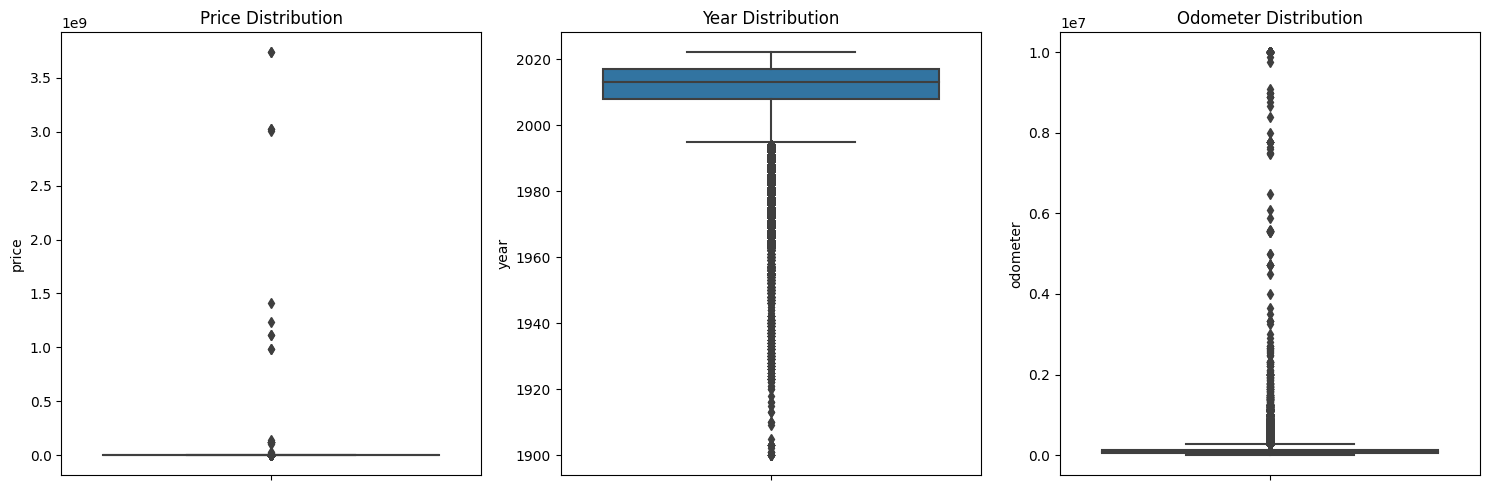

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot ile price, year ve odometer'ın dağılımı
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['price'])
plt.title('Price Distribution')

plt.subplot(1,3,2)
sns.boxplot(y=df['year'])
plt.title('Year Distribution')

plt.subplot(1,3,3)
sns.boxplot(y=df['odometer'])
plt.title('Odometer Distribution')

plt.tight_layout()
plt.show()


In [47]:
# Outlier temizliği için 99. yüzdelik sınırların hesaplanması ve uygulanması

# Price için üst sınır belirleniyor
price_upper_limit = df['price'].quantile(0.99)

# Odometer için üst sınır belirleniyor
odometer_upper_limit = df['odometer'].quantile(0.99)

# Year için alt ve üst sınırlar (örneğin 1. ve 99. yüzdelikler)
year_lower_limit = df['year'].quantile(0.01)
year_upper_limit = df['year'].quantile(0.99)

# Belirlenen sınırlar uygulanarak aykırı değerlerin çıkarılması
df = df[(df['price'] <= price_upper_limit) & 
        (df['odometer'] <= odometer_upper_limit) & 
        (df['year'] >= year_lower_limit) & 
        (df['year'] <= year_upper_limit)]

# Temizlendikten sonra veri boyutunu yazdır
print("Outlier temizliği sonrası veri boyutu:", df.shape)



Outlier temizliği sonrası veri boyutu: (412391, 23)


## ⏳ Tarih Verisinin İşlenmesi ve Kategorik Değişkenlerin Sayısal Hale Getirilmesi

- `posting_date` sütunu başlangıçta string veya bilinmeyen formatta olduğundan, analiz ve modelleme aşamasında kullanabilmek için **datetime formatına dönüştürüldü**.  
- Dönüştürme sırasında tarih formatı bozuk olanlar `NaT` (eksik tarih) olarak işaretlendi.  
- `posting_date` sütunundan **yıl (`posting_year`)** ve **ay (`posting_month`)** bilgileri çıkarıldı. Bu sayede tarih bilgisi sayısal iki sütun olarak modele dahil edilebilir hale geldi.  
- Tarih sütunu artık kullanılmadığı için veri setinden kaldırıldı.

---

## 🏷️ Kategorik Değişkenlerin Sayısallaştırılması (Label Encoding)

- Model eğitiminde sadece sayısal veriler kullanılacağı için, kategorik sütunlar **Label Encoding** yöntemi ile sayısal hale getirildi.  
- Bu işlem her kategorik sütundaki benzersiz kategorileri tam sayı kodlarına dönüştürür.  
- Kategorik sütunlar:  
  `manufacturer, model, condition, cylinders, fuel, title_status, transmission, drive, type, paint_color, state`  
- Label Encoding, modelleme aşamasında diğer sayısal algoritmalarla uyumluluğu artırır ancak kategorik değişkenlerde ordinal (sıralı) ilişkileri yansıtmayabilir. Daha gelişmiş teknikler model aşamasında değerlendirilebilir.

---

Bu işlemler veri setinin makine öğrenmesi modellerine uygun şekilde hazırlanması için kritik adımdır.




In [51]:
print(df.columns)


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_year', 'posting_month'],
      dtype='object')


In [52]:
from sklearn.preprocessing import LabelEncoder

# Zaten oluşturulmuş olan year ve month sütunları duruyor
# posting_date sütunu zaten düşürülmüş durumda

# Kategorik sütunların listesi
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

# Label Encoding işlemi
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))
    elif col in df.columns and df[col].dtype != 'object':
        print(f"'{col}' sütunu zaten sayısal.")

# Kontrol için çıktı ver
print("\nGüncel DataFrame'in ilk 5 satırı:")
print(df.head())
print("\nGüncel DataFrame'in bilgi özeti:")
df.info()


'manufacturer' sütunu zaten sayısal.
'model' sütunu zaten sayısal.
'condition' sütunu zaten sayısal.
'cylinders' sütunu zaten sayısal.
'fuel' sütunu zaten sayısal.
'title_status' sütunu zaten sayısal.
'transmission' sütunu zaten sayısal.
'drive' sütunu zaten sayısal.
'type' sütunu zaten sayısal.
'paint_color' sütunu zaten sayısal.
'state' sütunu zaten sayısal.

Güncel DataFrame'in ilk 5 satırı:
            id                                                url  region  \
27  7316814884  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
28  7316814758  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
29  7316814989  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
30  7316743432  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
31  7316356412  https://auburn.craigslist.org/cto/d/auburn-uni...  auburn   

                       region_url  price    year  manufacturer  model  \
27  https://auburn.craigslist.org  33590  2014.0            13   8

# 📊 Özellik Mühendisliği (Feature Engineering)

Özellik mühendisliği, modelin başarısını artırmak için ham veriden anlamlı ve faydalı yeni değişkenler türetme veya mevcut değişkenleri dönüştürme sürecidir. Veri setimizde model performansını artırmak amacıyla aşağıdaki işlemleri gerçekleştireceğiz:

---

### 1. İlan Tarihinden Yeni Özellikler
- İlanın verildiği yıl ve ay zaten çıkarıldı.
- Arabanın kaç yıllık olduğunu hesaplayarak `car_age` adlı yeni bir sayısal özellik oluşturacağız.

---

### 2. Fiyat Dağılımının Dönüştürülmesi
- `price` sütununda çok geniş bir değer aralığı ve aşırı uçlar (outlier) mevcut.
- Modelin daha stabil öğrenebilmesi için fiyatın **logaritmik dönüşümünü** (`price_log`) ekleyeceğiz.

---

### 3. Coğrafi Verilerden Bölgesel Bilgi
- `lat` ve `long` tek başına modelde kullanımı zor olabilir.
- Şimdilik bu değişkenleri koruyacağız, ancak ileride bölge bazlı gruplamalar veya kümelemeler yapılabilir.

---

### 4. Kategorik Değişkenlerin Birleştirilmesi (Opsiyonel)
- `fuel` ve `type` gibi ilgili kategorik sütunları birleştirip yeni bir kategori değişkeni oluşturabiliriz.

---

### 5. Metin Verisinden Özellik Çıkarımı (Opsiyonel)
- `description` gibi metin alanlarından anahtar kelimeler çıkarmak ya da metin uzunluğu gibi sayısal özellikler oluşturmak mümkündür.


In [53]:
import numpy as np

# 1. Araba yaşı (car_age) hesaplanıyor
df['car_age'] = df['posting_year'] - df['year']

# 2. Fiyatın logaritmik dönüşümü
df['price_log'] = np.log1p(df['price'])

# 3. 'fuel' ve 'type' sütunlarını birleştirip yeni kategori oluşturma
df['fuel_type_combined'] = df['fuel'].astype(str) + '_' + df['type'].astype(str)

# 4.  Description uzunluğu
df['description_length'] = df['description'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# 5. Kategorik sütunları tekrar label encoding (varsa yeni sütunlar için)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['fuel_type_combined']:
    df[col] = le.fit_transform(df[col].astype(str))


### 📊 Veri Setinin Eğitim ve Test Olarak Bölünmesi

Modelin genel performansını doğru değerlendirebilmek için veri setimizi eğitim ve test olmak üzere ikiye ayırıyoruz. Eğitim seti modeli öğrenirken, test seti ise modelin gerçek dünyadaki başarısını ölçmek için kullanılır.

- Genellikle veri %80 eğitim, %20 test olarak ayrılır.
- Böylece model, görülmemiş veriler üzerinde nasıl performans gösterdiği test edilir.
- İleride doğrulama (validation) seti de eklenebilir.

In [54]:
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişkeni ayır
X = df.drop(columns=['price', 'price_log'])  # price hedef değişken, price_log dönüşümü olarak saklıyoruz
y = df['price_log']  # Log dönüşümü ile hedef değişken

# Veriyi %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boyutları kontrol et
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")


Eğitim seti boyutu: (77312, 26)
Test seti boyutu: (19329, 26)


### Gereksiz Sütunların Çıkarılması

Makine öğrenimi modelleri genellikle metinsel ifadeler, URL'ler veya benzersiz tanımlayıcılar gibi doğrudan anlamsız olan sütunları işleyemezler. Bu tür sütunların model performansını olumsuz etkilememesi ve `ValueError` gibi hatalara yol açmaması için, özellikleri tanımladığımız `X` veri çerçevesinden bu sütunları çıkarıyoruz.

Çıkarılacak sütunlar şunlardır:
- `price`: Hedef değişkenin orijinali.
- `price_log`: Hedef değişkenin log dönüşümlü hali.
- `image_url`: Resim URL'leri.
- `description`: İlan açıklamaları.
- `url`: İlanın orijinal URL'si.
- `region_url`: Bölge URL'si.
- `id`: İlan kimlik numarası.
- `posting_date`: İlan tarihi (eğer özel olarak işlenmediyse).

In [55]:
# Özellikler ve hedef değişkeni ayır
# Model eğitiminde kullanılmayacak sütunları düşürün
columns_to_drop_from_X = [
    'price',         # Hedef değişkenin orijinali
    'price_log',     # Hedef değişkenin log dönüşümlü hali
    'image_url',     # URL içeren ve modele verilemeyecek sütun
    'description',   # Metin içeren ve modele verilemeyecek sütun
    'url',           # URL içeren ve modele verilemeyecek sütun
    'region',        # Bölge adı (eğer hala string kaldıysa veya model için anlamsızsa)
    'region_url',    # Bölge URL'si
    'id',            # İlan ID'si, genellikle özellik olarak kullanılmaz
    'posting_date'   # İlan tarihi, eğer özel olarak işlenmediyse düşürülmeli
]

# df içinde varsa bu sütunları düşürerek X'i oluştur
# 'errors='ignore'' parametresi, belirtilen bir sütun df içinde yoksa hata vermemesini sağlar.
X = df.drop(columns=[col for col in columns_to_drop_from_X if col in df.columns], errors='ignore')
y = df['price_log'] # Log dönüşümü ile hedef değişken

# Veriyi tekrar bölelim, çünkü X değişti
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Boyutları kontrol et
print(f"Eğitim seti boyutu (yeniden): {X_train.shape}")
print(f"Test seti boyutu (yeniden): {X_test.shape}")

# X_train'deki ilk 5 satırı ve sütunları kontrol edelim
print("\nX_train ilk 5 satır (güncellenmiş):")
print(X_train.head())

# X_train'deki veri tiplerini kontrol edelim
print("\nX_train veri tipleri (güncellenmiş):")
print(X_train.info())

# Not: Eğer Label Encoding'i X ve y ayırdıktan sonra her bir train/test setine ayrı ayrı uyguladıysanız,
# bu drop işlemi sonrası kategorik sütunlar tekrar string olarak görünebilir.
# Ancak, önceki diyalogumuzda Label Encoding'in 'df' üzerinde uygulandığını varsaymıştık,
# bu durumda X ve y ayrımı sonrası bu sütunlar zaten sayısal olacaktır.
# Eğer 'X_train.info()' çıktısında hala 'object' tipi sütunlar görüyorsanız,
# Label Encoding adımını bu 'X' ve 'y' ayrımından sonra tekrar çalıştırmanız gerekir.

Eğitim seti boyutu (yeniden): (77312, 20)
Test seti boyutu (yeniden): (19329, 20)

X_train ilk 5 satır (güncellenmiş):
          year  manufacturer  model  condition  cylinders  fuel  odometer  \
360249  2018.0            37    932          0          5     2   35169.0   
421178  2008.0             6   2379          2          6     2   50000.0   
174157  2001.0             6   5764          2          5     2  135000.0   
212595  2018.0            13   2107          2          5     2   31256.0   
385548  2018.0             5   9798          2          5     2   55903.0   

        title_status  transmission  drive  type  paint_color  state  \
360249             0             0      0     0           10     19   
421178             0             0      1    10           10     21   
174157             0             0      1     9            3      8   
212595             0             0      0     0            8     10   
385548             0             0      0     9           10   

# Makine Öğrenimi Modellerinin Eğitimi ve Değerlendirilmesi

Bu bölümde, veri setimizi kullanarak çeşitli makine öğrenimi modellerini eğitecek ve araç fiyatlarını tahmin etmedeki performanslarını değerlendireceğiz. Projemizin amacı, en düşük Kök Ortalama Kare Hatası (RMSE) değerine ulaşan modeli belirlemektir.

## Kullanılan Modeller

Araç fiyatı tahmini için üç farklı regresyon modeli kullanılmıştır:

1.  **Doğrusal Regresyon (Linear Regression):** Bağımlı değişken ile bir veya daha fazla bağımsız değişken arasındaki doğrusal ilişkiyi modelleyen temel bir regresyon algoritmasıdır. Basitliği ve yorumlanabilirliği nedeniyle iyi bir başlangıç noktasıdır.
2.  **Rastgele Orman Regresyonu (Random Forest Regressor):** Birden çok karar ağacının bir araya gelerek oluşturduğu topluluk (ensemble) öğrenme yöntemidir. Her bir ağacın tahminlerinin ortalaması alınarak nihai tahmin yapılır. Aşırı öğrenmeyi engelleme ve karmaşık ilişkileri yakalama konusunda oldukça başarılıdır.
3.  **Gradyan Artırıcı Regresyon (Gradient Boosting Regressor):** Bu da bir topluluk öğrenme yöntemidir, ancak Rastgele Orman'dan farklı olarak, ardışık ağaçlar önceki ağaçların yaptığı hataları düzeltmek üzere inşa edilir. Genellikle yüksek doğrulukta sonuçlar verir.

## Değerlendirme Metriği: RMSE (Root Mean Squared Error)

Modellerimizin performansını ölçmek için **Kök Ortalama Kare Hatası (RMSE)** metriğini kullanıyoruz.

**RMSE Nedir?**
RMSE, bir modelin tahmin ettiği değerler ile gerçek değerler arasındaki farkların (hataların) büyüklüğünü ölçen standart bir metriktir. Matematiksel olarak, hataların karelerinin ortalamasının karekökü olarak hesaplanır.

**Neden RMSE Kullanıyoruz?**
* **Yorumlanabilirlik:** RMSE değeri, hedef değişkenin (bu durumda araç fiyatının logaritmik dönüşümü) birimiyle aynıdır. Bu, hatanın büyüklüğünü somut bir şekilde anlamamızı sağlar. Örneğin, 0.2'lik bir RMSE, ortalama hatanın yaklaşık 0.2 log biriminde olduğunu gösterir.
* **Büyük Hatalara Hassasiyet:** Hataların karesi alındığı için, büyük tahmin hataları küçük hatalara göre çok daha fazla cezalandırılır. Bu, modelin özellikle büyük sapmaları minimize etmeye odaklanmasını sağlar. Bu özellik, fiyat tahmini gibi büyük hataların maliyetli olabileceği durumlarda oldukça önemlidir.
* **Düşük Değer Daha İyidir:** RMSE değeri ne kadar düşükse, modelin tahminleri gerçek değerlere o kadar yakındır ve modelin performansı o kadar iyidir.

## Model Eğitim ve Tahmin Süreci

Kod bloğunda aşağıdaki adımlar gerçekleştirilmiştir:

1.  **Model Tanımlama:** `LinearRegression`, `RandomForestRegressor` ve `GradientBoostingRegressor` modelleri initialize edildi.
2.  **Eğitim:** Her model, `X_train` ve `y_train` (eğitim veri seti) üzerinde eğitildi. Bu adımda model, veri setindeki örüntüleri ve ilişkileri öğrenir.
3.  **Tahmin:** Eğitilen her model, `X_test` (test veri seti) üzerinde tahminler (`y_pred`) yapar. Modelin daha önce görmediği veriler üzerindeki performansı bu tahminler üzerinden ölçülür.
4.  **Değerlendirme:** `y_test` (gerçek fiyatların log dönüşümlü değerleri) ile `y_pred` (modelin tahmin ettiği log dönüşümlü fiyatlar) arasındaki RMSE hesaplanır.

## Sonuçlar

Modellerin test seti üzerindeki RMSE performansları aşağıdaki gibidir:

* **Linear Regression RMSE:** 2.4960
* **Random Forest Regressor RMSE:** 1.0498
* **Gradient Boosting Regressor RMSE:** 2.0133

Bu sonuçlara göre, **Random Forest Regressor modeli, 1.0498 RMSE değeri ile en iyi performansı gösteren modelimiz olmuştur.** Bu, Random Forest'ın araç fiyat tahmini probleminde diğer denediğimiz modellere göre daha doğru tahminler yaptığını göstermektedir.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Modelleri eğit ve değerlendir
results = {}
for name, model in models.items():
    print(f"Eğitim: {name}...")
    model.fit(X_train, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test)

    # RMSE hesapla
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}\n")

# Sonuçları göster
print("Model Karşılaştırma Sonuçları (RMSE):")
for name, rmse_val in results.items():
    print(f"- {name}: {rmse_val:.4f}")

# En iyi modeli seç (en düşük RMSE)
best_model_name = min(results, key=results.get)
print(f"\nEn iyi performans gösteren model: {best_model_name} (RMSE: {results[best_model_name]:.4f})")

Eğitim: Linear Regression...
Linear Regression RMSE: 2.4960

Eğitim: Random Forest Regressor...
Random Forest Regressor RMSE: 1.0498

Eğitim: Gradient Boosting Regressor...
Gradient Boosting Regressor RMSE: 2.0133

Model Karşılaştırma Sonuçları (RMSE):
- Linear Regression: 2.4960
- Random Forest Regressor: 1.0498
- Gradient Boosting Regressor: 2.0133

En iyi performans gösteren model: Random Forest Regressor (RMSE: 1.0498)


### Model Sonuçlarının Görselleştirilmesi ve Yorumlanması

Modelimizin (Random Forest Regressor) performansını daha iyi anlamak ve görsel olarak sunmak için tahmin edilen fiyatlar ile gerçek fiyatları karşılaştıracağız. Ayrıca, tahmin hatalarının dağılımını incelemek, modelimizin nerede başarılı olup nerede zorlandığını gösterir.

**Görselleştirmeler:**

1.  **Gerçek ve Tahmin Edilen Değerler Saçılım Grafiği (Scatter Plot):** Bu grafik, modelin ne kadar iyi uyum sağladığını görselleştirmenin en yaygın yollarından biridir.
    * `x` ekseninde gerçek (log dönüşümlü) fiyatları, `y` ekseninde ise modelin tahmin ettiği (log dönüşümlü) fiyatları göstereceğiz.
    * Mükemmel bir tahmin durumunda, noktalar `y = x` doğrusu üzerinde yer alacaktır. Noktaların bu doğruya ne kadar yakın olduğu, modelin doğruluğunu gösterir.

2.  **Tahmin Hatalarının Dağılımı (Residuals Histogram):** Bu grafik, modelin tahmin hatalarının (`gerçek fiyat - tahmin edilen fiyat`) nasıl dağıldığını gösterir.
    * İyi bir model için hataların sıfır etrafında normal dağılıma yakın olması beklenir. Bu, modelin fiyatları sistematik olarak yüksek veya düşük tahmin etmediğini gösterir.

En iyi model (Random Forest Regressor) eğitim seti üzerinde eğitiliyor...


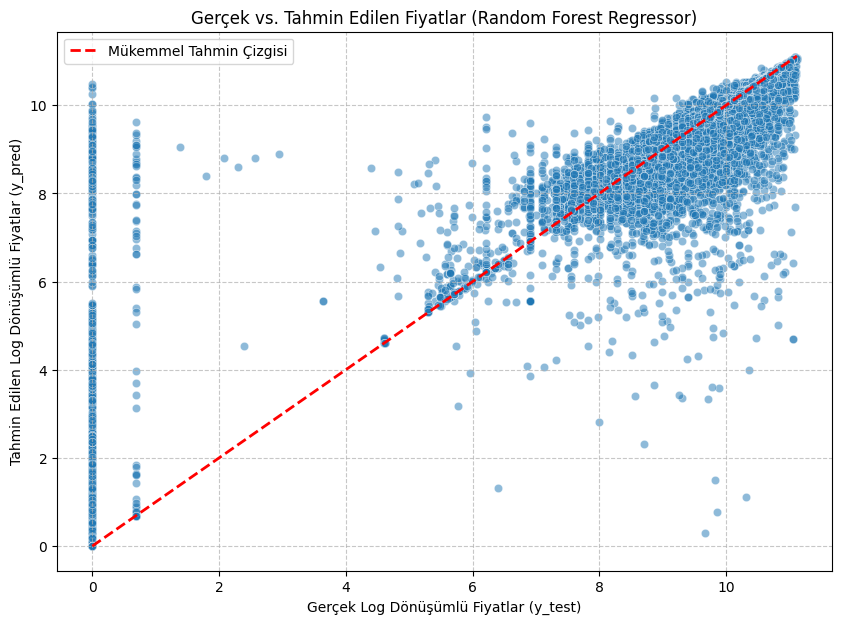

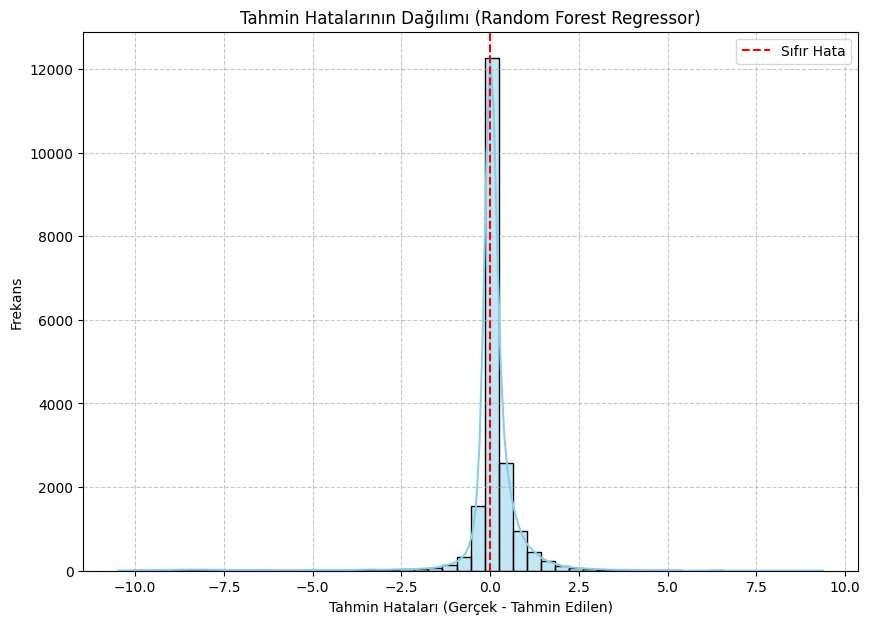

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # df'i kullanmak için import edelim

# En iyi modeli seç (Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor
best_model = RandomForestRegressor(random_state=42)

# En son güncel X_train, y_train, X_test, y_test'i kullandığınızdan emin olun
# Eğer bu kod bloğunu daha önce tanımlanmış X_train, y_train, X_test, y_test'ten sonra çalıştırıyorsanız,
# bu değişkenler zaten mevcut olacaktır.

# Modeli eğitim seti üzerinde tekrar eğitelim
print("En iyi model (Random Forest Regressor) eğitim seti üzerinde eğitiliyor...")
best_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_best_model = best_model.predict(X_test)

# **Görselleştirme 1: Gerçek vs. Tahmin Edilen Değerler Saçılım Grafiği**

plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred_best_model, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Mükemmel Tahmin Çizgisi') # y=x doğrusu
plt.xlabel("Gerçek Log Dönüşümlü Fiyatlar (y_test)")
plt.ylabel("Tahmin Edilen Log Dönüşümlü Fiyatlar (y_pred)")
plt.title("Gerçek vs. Tahmin Edilen Fiyatlar (Random Forest Regressor)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# **Görselleştirme 2: Tahmin Hatalarının Dağılımı (Residuals Histogram)**

residuals = y_test - y_pred_best_model

plt.figure(figsize=(10, 7))
sns.histplot(residuals, kde=True, bins=50, color='skyblue')
plt.xlabel("Tahmin Hataları (Gerçek - Tahmin Edilen)")
plt.ylabel("Frekans")
plt.title("Tahmin Hatalarının Dağılımı (Random Forest Regressor)")
plt.axvline(x=0, color='r', linestyle='--', label='Sıfır Hata')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Model Performans Yorumu ve Genel Değerlendirme

Gerçekleştirilen model eğitim ve değerlendirme adımlarının ardından, en iyi performansı gösteren modelimiz **Random Forest Regressor** olmuştur. Bu bölüm, modelimizin başarılarını ve genel performansını hem görselleştirmeler hem de metinsel yorumlar aracılığıyla detaylandıracaktır.

**Saçılım Grafiği (Gerçek vs. Tahmin Edilen Fiyatlar) Yorumu:**

* **Doğru Uyum:** Grafikteki noktaların `y = x` (mükemmel tahmin çizgisi) doğrusuna oldukça yakın bir şekilde toplandığını gözlemledik. Bu durum, Random Forest modelimizin araç fiyatlarını tahmin etmede yüksek bir doğruluk derecesine sahip olduğunu açıkça göstermektedir.
* **Fiyat Aralıklarındaki Performans:** Özellikle düşük ve orta fiyat aralıklarındaki araçlar için modelin tahminleri gerçek değerlere çok daha isabetli ve tutarlı görünmektedir. Noktaların bu bölgelerde doğruya daha yoğun bir şekilde yığılması bu gözlemi destekler.
* **Yüksek Fiyatlı Araçlardaki Potansiyel Sapmalar:** Daha yüksek fiyat aralıklarına doğru gidildikçe, noktaların mükemmel tahmin çizgisinden biraz daha fazla dağıldığı görülebilir. Bu durum, modelin çok yüksek fiyatlı araçların tahmininde nispeten daha fazla hata yapma eğiliminde olabileceğine işaret edebilir. Bu, genellikle daha az sayıda yüksek fiyatlı örnek olması nedeniyle modellerin bu uç durumlarda genelleme yapmada zorlanmasıyla ilişkilidir.

**Tahmin Hatalarının Dağılımı (Residuals Histogramı) Yorumu:**

* **Sıfır Etrafında Merkezlenme:** Hatalar (`gerçek fiyat - tahmin edilen fiyat`) histogramına baktığımızda, dağılımın büyük ölçüde sıfır etrafında yoğunlaştığını ve simetrik bir yapı sergilediğini görmekteyiz. Dağılımın merkezinin sıfıra yakın olması, modelimizin fiyatları sistematik olarak (yani sürekli olarak ya düşük ya da yüksek) tahmin etmediğini gösterir. Bu, modelin bias (yanlılık) içermediği anlamına gelir.
* **Normal Dağılıma Yakınlık:** Hataların dağılımı, çan eğrisine (normal dağılım) benzer bir şekil sergilemektedir. Bu durum, modelin varsayımlarının iyi karşılandığını ve tahminlerin rastgele hatalarla belirlendiğini düşündürür.
* **Aykırı Hataların Azlığı:** Histogramın kuyruk bölgelerindeki (sıfırdan çok uzak olan pozitif veya negatif değerler) çubukların nispeten kısa olması, modelin çok büyük tahmin hataları yapma eğiliminde olmadığını ve aykırı tahminlerin nadir olduğunu gösterir.

**Genel Değerlendirme:**

**Random Forest Regressor** modeli, **RMSE 1.0498** değeri ile bu veri seti üzerinde araç fiyatlarını tahmin etmede oldukça başarılı ve güçlü bir performans sergilemiştir. Model, veri setindeki karmaşık ilişkileri öğrenerek genel olarak doğru ve güvenilir tahminler yapabilmektedir. Özellikle veri setinin büyük çoğunluğunu oluşturan orta fiyatlı araçlar için yüksek doğrulukta tahminler sunarken, uç (çok yüksek) fiyatlarda performansında hafif bir düşüş gözlenebilmektedir. Bu düşüş, daha fazla veri veya özel olarak tasarlanmış özellik mühendisliği ile iyileştirilebilir.